[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ClimateMatchAcademy/course-content/blob/main/tutorials/W1D4_Paleoclimate/W1D4_Tutorial4.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/{ORG}/course-content/main/tutorials/W1D4_Paleoclimate/W1D4_Tutorial4.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# **Tutorial 4: Reconstructing Past Changes in Atmospheric Climate**
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Yosmely Bermúdez, Dionessa Biton, Katrina Dobson, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Brodie Pearson, Jenna Pearson, Chi Zhang, Ohad Zivan 

**Content editors:** Yosmely Bermúdez, Zahra Khodakaramimaghsoud, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS and Google DeepMind

# **Tutorial Objectives**

In this tutorial, we’ll analyze δD and atmospheric CO<sub>2</sub> data from the EPICA Dome C ice core. Recall from the video that δD and δ<sup>18</sup>O measurements on ice cores record past changes in temperature, and that measurements of CO<sub>2</sub> trapped in ice cores can be used to reconstruction past changes in Earth's atmospheric composition.

By the end of this tutorial you will be able to:

*   Plot δD and CO<sub>2</sub> records from the EPICA Dome C ice core
*   Assess changes in temperature and atmospheric greenhouse gas concentration over the past 800,000 years 


# Setup

In [1]:
# Import libraries
import pandas as pd
import pooch
import os
import tempfile
import pyleoclim as pyleo

In [2]:
# @title Video 1: Speaker Introduction
#Tech team will add code to format and display the video

In [3]:
# helper functions

def pooch_load(filelocation=None,filename=None,processor=None):
    shared_location='/home/jovyan/shared/Data/tutorials/W1D4_Paleoclimate' # this is different for each day
    user_temp_cache=tempfile.gettempdir()
    
    if os.path.exists(os.path.join(shared_location,filename)):
        file = os.path.join(shared_location,filename)
    else:
        file = pooch.retrieve(filelocation,known_hash=None,fname=os.path.join(user_temp_cache,filename),processor=processor)

    return file

# Section 1: Exploring past variations in atmospheric CO<sub>2</sub>

As we learned in the video, paleoclimatologists can reconstruct past changes in atmospheric composition by measuring gases trapped in layers of ice from ice cores retrieved from polar regions and high elevation mountain glaciers. We'll specifically be focusing on paleoclimate records produced from the [EPICA Dome C](https://en.wikipedia.org/wiki/Dome_C) ice core from Antarctica.

![](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fncomms8850/MediaObjects/41467_2015_Article_BFncomms8850_Fig1_HTML.jpg?as=webp)

Credit: [Conway et al 2015, *Nature Communications*](https://www.nature.com/articles/ncomms8850)


Let's start by downloading the data for the composite CO<sub>2</sub> record for EPICA Dome C in Antarctica:

In [5]:
# donwload the data using the url
filename_antarctica2015='antarctica2015co2composite.txt'
url_antarctica2015='https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt'

data_path=pooch_load(filelocation=url_antarctica2015,filename=filename_antarctica2015) # open the file

co2df = pd.read_csv(data_path, skiprows=137, sep='\t')

co2df.head()

,age_gas_calBP,co2_ppm,co2_1s_ppm
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04


Next, we can store this data as a `Series` in Pyleoclim:

In [6]:
ts_co2 = pyleo.Series(
    time=co2df['age_gas_calBP']/1000,
    value=co2df['co2_ppm'],
    time_name='Age',
    time_unit='kyr BP',
    value_name = r'$CO_2$',
    value_unit='ppm',
    label='EPICA Dome C CO2'
)

Time axis values sorted in ascending order


We can now plot age vs. CO<sub>2</sub> from EPICA Dome C:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [ka]', ylabel='$CO_2$ [ppm]'>)

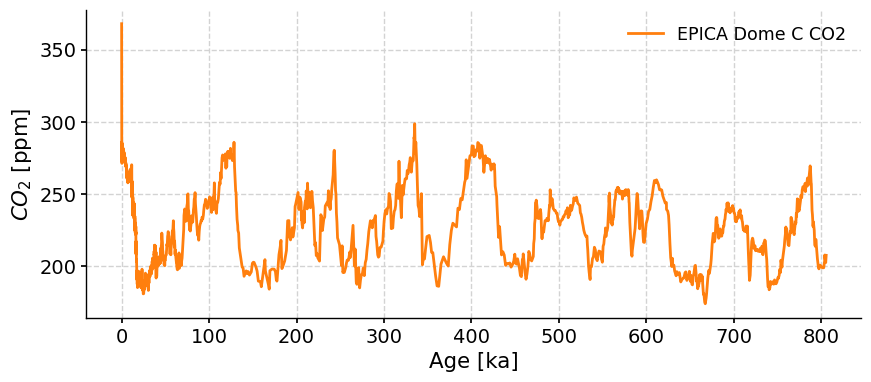

In [7]:
ts_co2.plot(color='C1')

Notice that the x-axis is plotted with present-day (0 kyr) on the left and the past (800 kyr) on the right. This is a common practice when plotting paleoclimate time series data.

These changes in CO<sub>2</sub> are tracking glacial-interglacial cycles (Ice Ages) over the past 800,000 years. Recall that these Ice Ages occur as a result of changes in the orbital cycles of Earth: eccentricity (100,000 year cycle), obliquity (40,000 year cycle) and precession (21,000 year cycle). Can you observe them in the graph above?

# Section 2: Exploring the relationship between δD and atmospheric CO<sub>2</sub>

To investigate the relationship between glacial cycles, atmospheric CO<sub>2</sub> and temperature, we can compare CO<sub>2</sub> to a record of hydrogen isotopic values (δD) of ice cores, which is a proxy for temperature in this case. Remember, when interpreting isotopic measurements of ice cores, a more depleted δD value indicates cooler temperatures, and a more enriched δD value indicates warmer temperatures. This is the opposite relationship we have looked at previously with &delta;<sup>18</sup>O, not because we are looking at a different isotope, but because we are not looking at the isotopic composition of ice rather than the isotopic composition of the ocean.

Let's download the EPICA Dome C δD data, store it as a `Series`, and plot the data:

In [8]:
# donwload the data using the url
filename_edc3deuttemp2007='edc3deuttemp2007.txt'
url_edc3deuttemp2007='https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt'
data_path=pooch_load(filelocation=url_edc3deuttemp2007,filename=filename_edc3deuttemp2007) # open the file

dDdf = pd.read_csv(
    data_path,
    skiprows=91,
    encoding='unicode_escape',
    sep="\s+"
)
# remove nan values
dDdf.dropna(inplace=True)

dDdf.head()

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.9,0.88
13,14,7.15,46.81203,-385.1,1.84
14,15,7.70,55.05624,-377.8,3.04
15,16,8.25,64.41511,-394.1,0.35
16,17,8.80,73.15077,-398.7,-0.42


In [9]:
dDts = pyleo.Series(
    time=dDdf['Age']/1000,
    value=dDdf['Deuterium'],
    time_name='Age',
    time_unit='kyr BP',
    value_name=r'$\delta D$',
    value_unit=u'\u2030',
    label=r'EPICA Dome C $\delta D$'
)

Time axis values sorted in ascending order


(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [ka]', ylabel='$\\delta D$ [‰]'>)

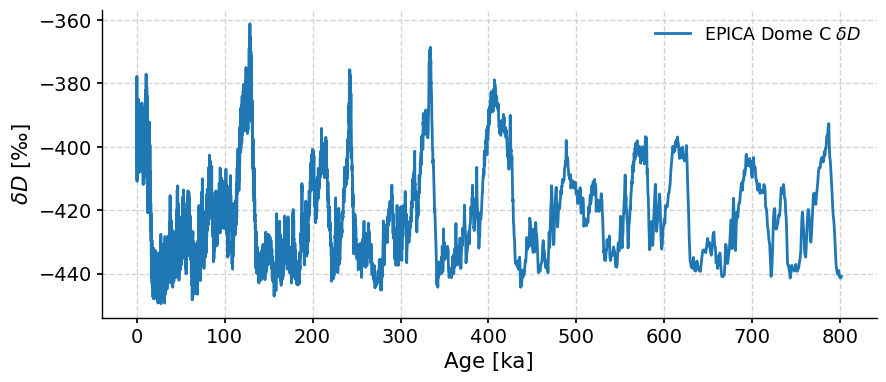

In [10]:
dDts.plot()

When we observe the δD data, we see very similar patterns as in the atmospheric CO<sub>2</sub> data. To more easily compare the two records, we can plot the two series side by side by putting them into a `MultipleSeries` object. Since the δD and CO<sub>2</sub> values have different units, we can first standardize the series and then plot the data. 

(<Figure size 1000x400 with 1 Axes>, <Axes: xlabel='Age [ka]', ylabel='value'>)

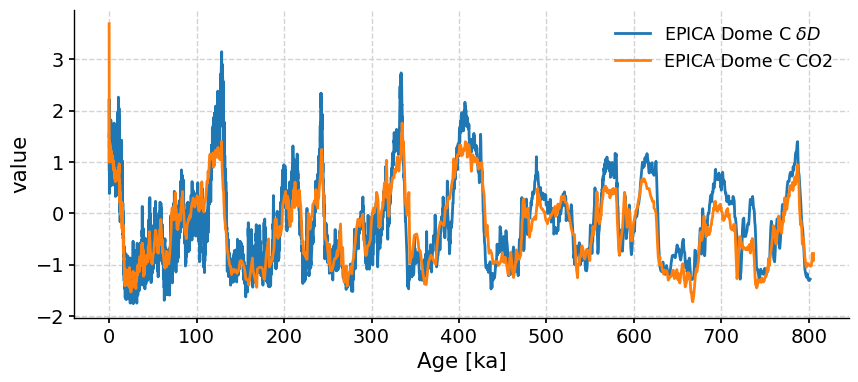

In [11]:
# combine series
ms = pyleo.MultipleSeries([dDts,ts_co2])

# standarize series and plot
ms.standardize().plot()

Now we can more easily compare the timing and magnitude of changes in CO<sub>2</sub> and δD at EPICA Dome C over the past 800,000 years. During glacial periods, δD was more depleted (cooler temperatures) and atmospheric CO<sub>2</sub>  was lower. During interglacial periods, δD was more enriched (warmer temperatures) and atmospheric CO<sub>2</sub>  was higher.

# **Questions 2: Climate Connection**

1.  Why do δD, CO<sub>2</sub> and glacial cycles covary so closely?
2.  Can you identify glacial and interglacial periods? Today, are we in an interglacial or glacial period?
3.  Do the cooling and warming periods of the cycles happen at the same rate?
4.  What climate forcings do you think are driving these cycles?

In [ ]:
# to_remove explanation

"""
1. During glacial periods, lower temperatures lead to more oceanic absorption of CO₂, reducing atmospheric CO₂ levels. During interglacial periods, the reverse happens. This mutual influence creates a feedback loop, resulting in the observed covariance between dD (a proxy for temperature), CO2 and glacial-interglacial cycles.
2. The glacial periods occur when dD is more negative (depleted) and atmospheric CO2 concentrations are lower, whereas interglacial periods occur when dD is more positive (enriched) and atmospheric CO2 concentrations are higher. Based on this, the most recent glacial period was ~20,000 years ago. Today, we are in an interglacial period. However, notice how the atmospheric CO2 concentration rapidly increases towards the present and exceeds the CO2 concentration of any other interglacial period over the past 800,000 years. What might be causing this?
3. The cooling periods tend to be more gradual while warming periods are relatively rapid. This pattern is especially apparent over the past 400,000 years.
4. These glacial-interglacial cycles are primarily driven by variations in Earth’s orbital parameters. These parameters include eccentricity, obliquity and precession, which vary on timescales of ~100,000 years, ~40,000 years and ~21,000 years, respectively. In later tutorials, we’ll learn how to identify temporal cyclicity in paleoclimate reconstructions and assess possible forcings with similar timescales of variation.

""";

# **Summary**
In this tutorial, we dove into the captivating world of paleoclimatology, focusing on the analysis of hydrogen isotopes (δD) and atmospheric CO<sub>2</sub> data from the EPICA Dome C ice core. This involved understanding how δD and &delta;<sup>18</sup>O measurements from ice cores can enlighten us about past temperature changes, and how trapped CO<sub>2</sub> in these ice cores can help us reconstruct shifts in Earth's atmospheric composition.

By the end of the tutorial, you should be comfortable with plotting δD and CO<sub>2</sub> records from the EPICA Dome C ice core and assessing changes in temperature and atmospheric greenhouse gas concentrations over the past 800,000 years. In the next tutorial, we'll introduce various paleoclimate data analysis tools. 


# **Resources**

Code for this tutorial is based on an existing notebook from LinkedEarth that [explores EPICA Dome C paleoclimate records](https://github.com/LinkedEarth/PaleoBooks/blob/master/notebooks/EpicaDomeC_explore.ipynb). 

Data from the following sources are used in this tutorial:

*   Jouzel, J., et al. Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years, Science (2007). https://doi.org/10.1126/science.1141038. 
*   Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949.
*   Bereiter, B. et al., Revision of the EPICA Dome C CO<sub>2</sub> record from 800 to 600 kyr before present, Geoph. Res. Let. (2014).  https://doi.org/10.1002/2014GL061957. 